In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,15)


In [64]:
df=pd.read_csv('heartdisease_data.csv')
df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [65]:
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [66]:
df.tail()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0
198,62,1,2,120,254,0,2,93,1,0,?,?,?,1


In [67]:
df.shape

(199, 14)

In [68]:
header_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df=pd.read_csv('heartdisease_data.csv',header=None,skiprows=1,names=header_names)

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [70]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])   

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,7,1,3,17,28,0,1,21,0,1,3,1,3,0
1,22,1,3,18,35,0,1,30,1,6,2,1,3,2
2,17,1,3,24,45,0,1,35,1,10,0,1,3,1
3,28,1,2,5,31,1,2,58,1,5,1,1,3,0
4,28,1,2,10,0,0,1,14,0,0,0,1,3,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       199 non-null    int64
 1   sex       199 non-null    int64
 2   cp        199 non-null    int64
 3   trestbps  199 non-null    int32
 4   chol      199 non-null    int32
 5   fbs       199 non-null    int32
 6   restecg   199 non-null    int64
 7   thalach   199 non-null    int32
 8   exang     199 non-null    int32
 9   oldpeak   199 non-null    int32
 10  slope     199 non-null    int32
 11  ca        199 non-null    int32
 12  thal      199 non-null    int32
 13  num       199 non-null    int64
dtypes: int32(9), int64(5)
memory usage: 14.9 KB


In [73]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,21.366834,0.969849,2.502513,24.768844,37.532663,0.412060,0.733668,33.552764,1.005025,7.914573,2.090452,0.989950,2.748744,1.517588
std,7.523103,0.171433,0.796928,12.570080,32.270600,0.560533,0.684918,20.795687,0.728202,5.020940,1.045365,0.099997,0.625377,1.222038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,2.000000,14.000000,1.500000,0.000000,0.000000,14.000000,0.000000,4.000000,1.000000,1.000000,3.000000,0.000000
50%,22.000000,1.000000,3.000000,24.000000,34.000000,0.000000,1.000000,30.000000,1.000000,9.000000,3.000000,1.000000,3.000000,1.000000
75%,26.000000,1.000000,3.000000,40.000000,62.500000,1.000000,1.000000,59.000000,2.000000,14.000000,3.000000,1.000000,3.000000,3.000000
max,38.000000,1.000000,3.000000,40.000000,99.000000,2.000000,2.000000,59.000000,2.000000,14.000000,3.000000,1.000000,3.000000,4.000000


<Figure size 1440x1440 with 0 Axes>

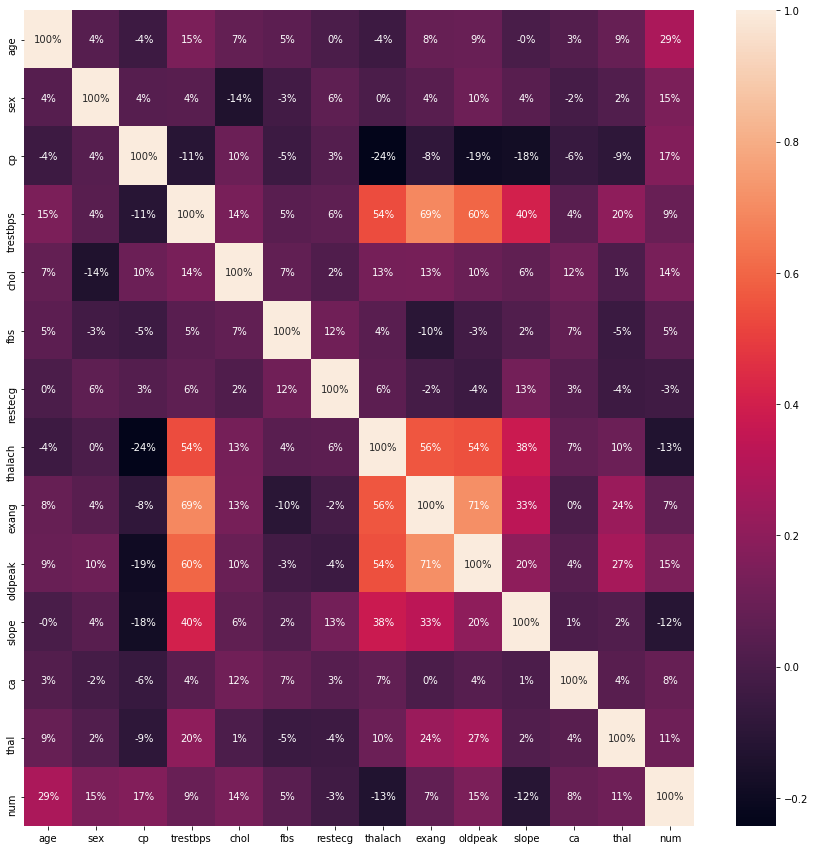

<Figure size 1440x1440 with 0 Axes>

In [74]:
sns.heatmap(df.corr(),annot=True,fmt='.0%')
plt.figure(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF8A83910>,
      dtype=object)

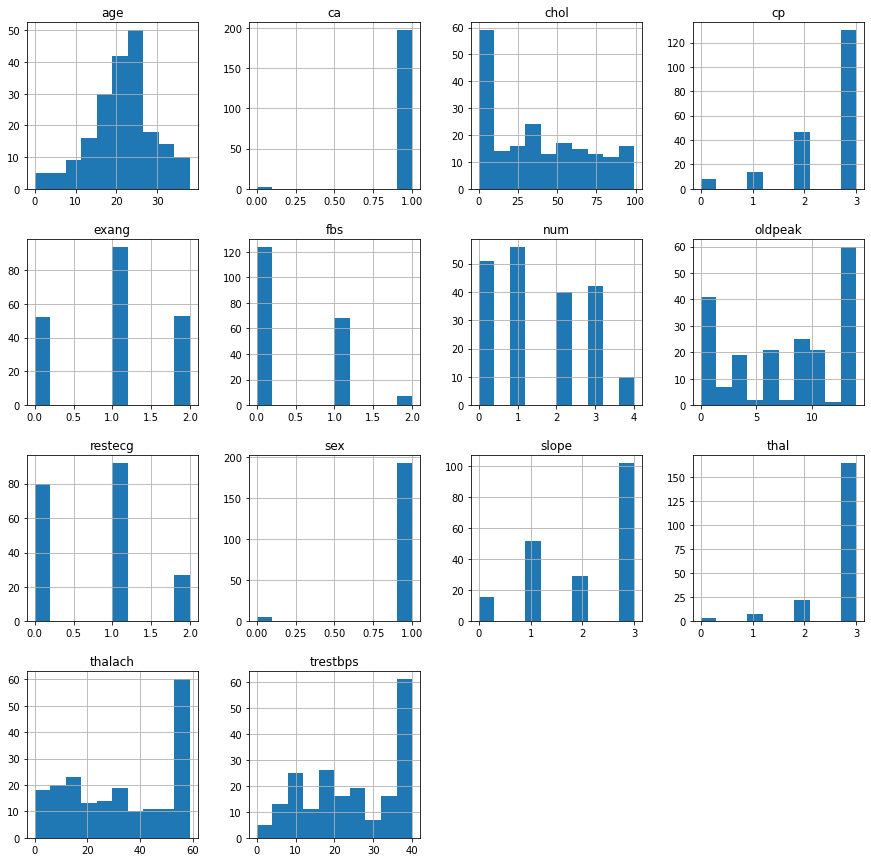

In [75]:
df.hist()

In [76]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [78]:
X=df.drop('num',axis=1)
y=df['num']
print('shape of X=',X.shape)
print('shape of y=',y.shape)

shape of X= (199, 13)
shape of y= (199,)


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print('shape of X_train=',X_train.shape)
print('shape of y_train=',y_train.shape)
print('shape of X_test=',X_test.shape)
print('shape of y_test=',y_test.shape)


shape of X_train= (159, 13)
shape of y_train= (159,)
shape of X_test= (40, 13)
shape of y_test= (40,)


In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [109]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
lr.coef_

array([ 0.03505519,  0.90918648,  0.25638247,  0.00251016,  0.00359293,
        0.10315272, -0.11446545, -0.00956296,  0.1276701 ,  0.02786513,
       -0.1403311 ,  0.98429494,  0.14084307])

In [83]:
lr.intercept_

-2.035250615888601

In [84]:
y_pred=lr.predict(X_test)
y_pred                

array([1.72959056, 1.34000512, 2.07122719, 1.87815076, 1.19308009,
       1.74415003, 0.62312432, 0.95056161, 1.32723371, 2.01607914,
       1.72294159, 1.26624993, 1.85956063, 1.84746978, 1.78882109,
       1.55182493, 2.10175078, 1.05396742, 1.07661519, 2.14470419,
       1.79484535, 1.28501974, 1.26571311, 1.55728863, 2.1697975 ,
       0.9943708 , 2.11022237, 1.82563654, 1.69249518, 2.35722335,
       1.42462234, 1.03856524, 0.34954919, 1.86727963, 1.51846483,
       1.63279301, 1.14630035, 1.9700378 , 1.91304305, 1.084858  ])

In [85]:
lr.score(X_test,y_test)

0.1753912762965777

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))

print('Mean squared error:',mean_squared_error(y_test,y_pred))



error:
Mean absolute error: 0.9580675490394659
Mean squared error: 1.3276200451625102


In [99]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.1753912762965777


In [100]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring='r2').mean()

0.12454322839668683

In [101]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


In [102]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(X_train,y_train)
    print('Score of',m,'is:',m.score(X_train,y_train))
    predm=m.predict(X_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.21185068449476085
Error:
Mean absolute error: 0.9580675490394659
Mean squared error: 1.3276200451625102
r2_score: 0.1753912762965777
***************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 0.95
Mean squared error: 1.8
r2_score: -0.11801242236024834
***************************************************************


Score of KNeighborsRegressor() is: 0.32602465078060805
Error:
Mean absolute error: 1.025
Mean squared error: 1.591
r2_score: 0.011801242236024967
***************************************************************


Score of SVR() is: 0.20436475517163621
Error:
Mean absolute error: 0.9826242651232864
Mean squared error: 1.3867371777105728
r2_score: 0.13867256042821574
***************************************************************


Score of Lasso() is: 0.09902113438041205
Error:
Mean absolute error: 1.0558631791209452
Mean squared error: 1.4760410307036866
r2_score: 0.

In [103]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(X,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [104]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(X_train,y_train)
print('Score:',ridge.score(X_train,y_train))
predrd=ridge.predict(X_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrd)) 
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('\n')
print('r2_score:',r2_score(y_test,predrd))

Score: 0.21028542449296117


Mean absolute error: 0.9641999167358796
Mean squared error: 1.3262967178065828


r2_score: 0.17621321875367535


In [105]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(X_train,y_train)
print('Score:',rf.score(X_train,y_train))
predrf=rf.predict(X_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.8443859901396877


Mean absolute error: 0.9762500000000001
Mean squared error: 1.4076875000000002


r2_score: 0.12565993788819874


In [107]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(X_train,y_train)
print('Score:',adb.score(X_train,y_train))
predadb=adb.predict(X_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.10399842223101985


Mean absolute error: 1.0435067042113335
Mean squared error: 1.4350410555535622


r2_score: 0.10867015183008566


In [108]:
import joblib
joblib.dump(rf,'heartdisease_data.csv')

['heartdisease_data.csv']